# Relatório de Análise VII

## Criando Agrupamentos

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [ ]:
dados.head(10)

In [ ]:
dados['Valor'].mean()

In [ ]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [ ]:
dados['Bairro'].drop_duplicates()

In [ ]:
grupo_bairro = dados.groupby('Bairro')

In [ ]:
# grupo_bairro.groups

In [ ]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

In [ ]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

### Exercício

In [ ]:

alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [ ]:
sexo = alunos.groupby('Sexo')
sexo['Notas'].mean().round(2)

## EStatísticas Descritivas

In [ ]:
grupo_bairro['Valor'].describe().round(2)

In [ ]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

In [ ]:
#documentacao do gráfico: https://matplotlib.org/

%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20,10))

In [ ]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [ ]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [ ]:
fig = grupo_bairro['IPTU'].max().plot.bar(color = 'blue')
fig.set_ylabel('IPTU do Aluguel')
fig.set_title('IPTU Médio do Aluguel por Bairro', {'fontsize': 22})

### Exercícios

In [108]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [109]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [110]:
estatisticas_prod = produtos['Preço'].aggregate(['mean', 'std', 'min', 'max']).round(2)

Text(0.5, 1.0, 'Estatística dos Produtos')

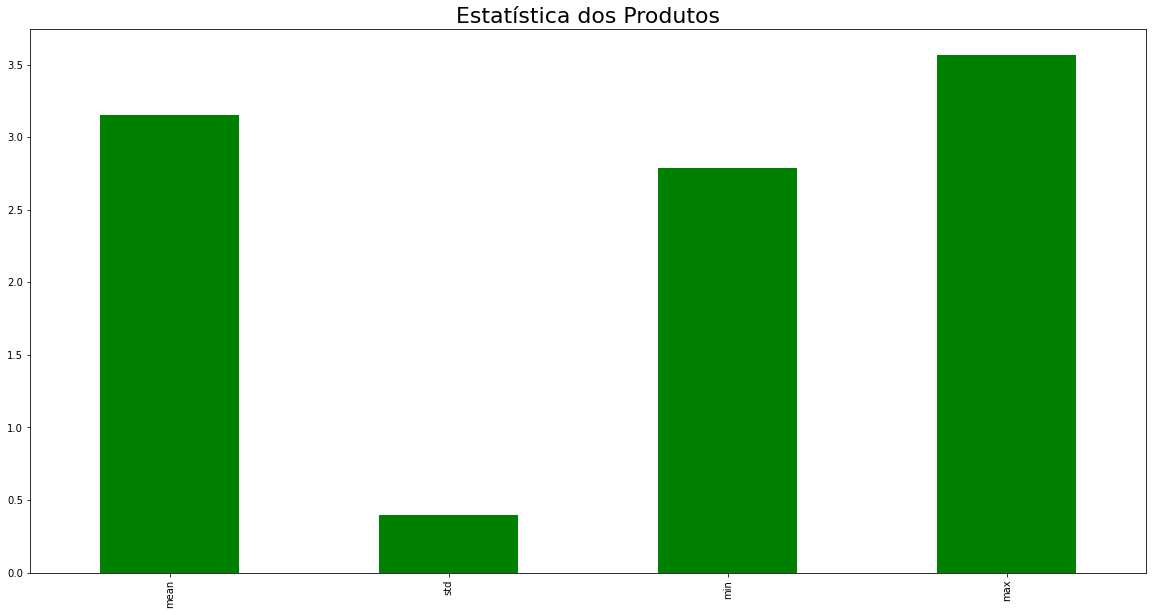

In [116]:
graph_prod = estatisticas_prod.mean().plot.bar(color='green')
graph_prod.set_title('Estatística dos Produtos', {'fontsize': 22})